In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import netCDF4 as nc
import cmocean as cm

In [3]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])


# Comparing salinity fluxes to physical fluxes

In [4]:
ulength = (grid['e2u'][0,361:(361+75),23])
udep = grid['e3u_0'][0,:,361:(361+75),23]

slice_ar = np.zeros([40,75])

for i in range(0,40):
    slice_ar[i,:] = ulength * udep[i,:]
    
slice_ar2 = np.zeros([40,75])
size_ar_masked = slice_ar*grid['umask'][0,:,361:361+75,23]

#broadcasting area per depth to size of dataset
size_perrow = np.nansum(size_ar_masked,axis = 1)
size_broad = np.zeros([7,40,12])

for i in range(0,7):
    for k in range(0,12):
        size_broad[i,:,k] = size_perrow

In [9]:
phys_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/phys_flux_stor_conc.pkl', 'rb'))  

sal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/sal_flux_stor_conc.pkl', 'rb'))  


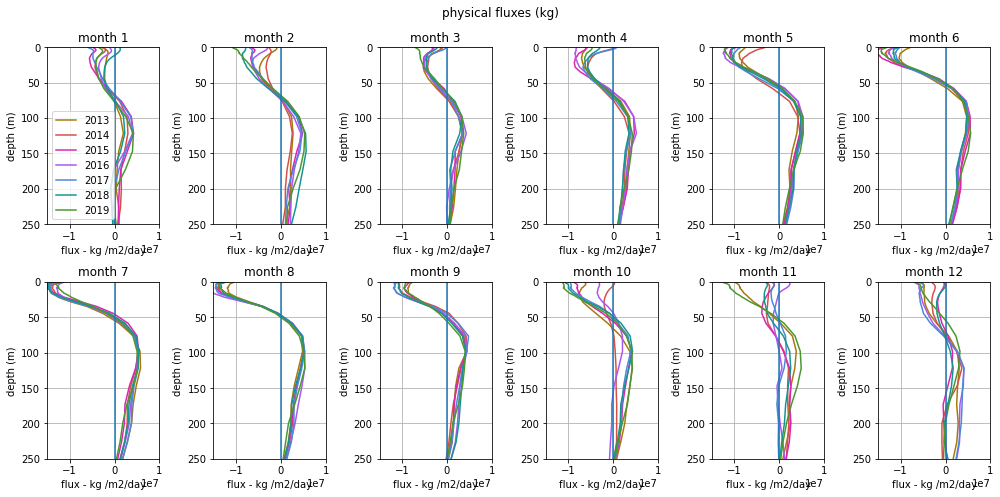

In [10]:
tcmap = cm.cm.phase
txmi = -1.5e7; txma =1e7
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(phys_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("flux - kg /m2/day")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('physical fluxes (kg)'); plt.tight_layout()


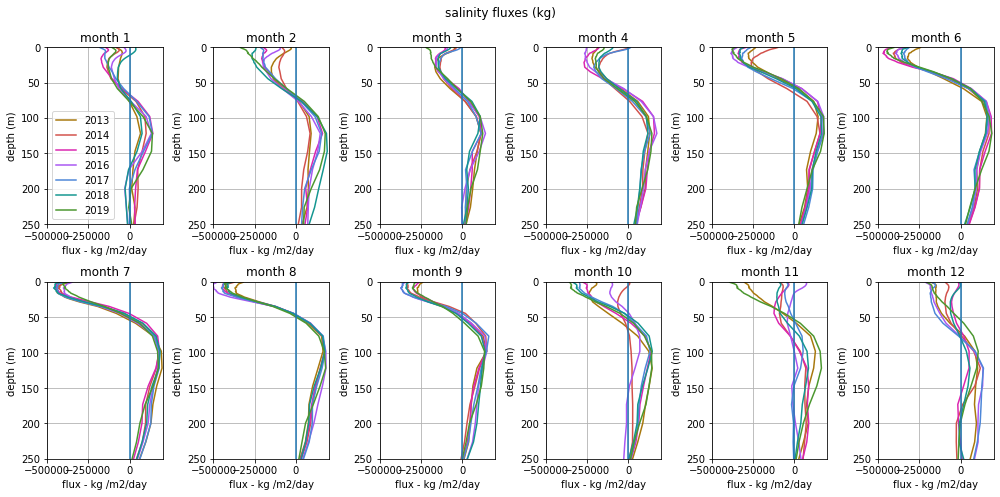

In [7]:
tcmap = cm.cm.phase
txmi = -5e5; txma =2e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("flux - kg /m2/day")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('salinity fluxes (kg)'); plt.tight_layout()


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-p

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-p

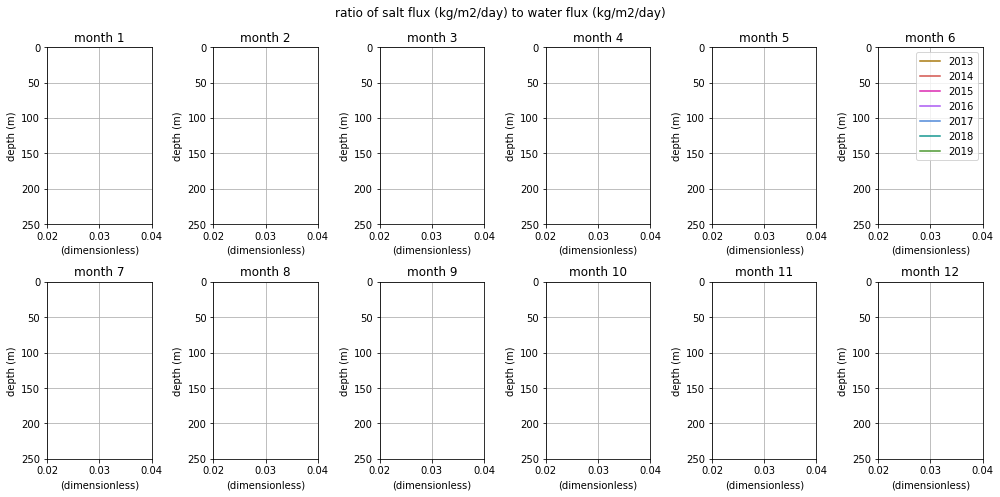

In [8]:
tcmap = cm.cm.phase
txmi = 0.02; txma =0.04
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(np.divide(sal_flux_stor_conc[y,:,i],phys_flux_stor_conc[y,:,i]),\
                    depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("(dimensionless)")
    axs[i].set_ylabel('depth (m)')
axs[5].legend()

plt.suptitle('ratio of salt flux (kg/m2/day) to water flux (kg/m2/day)'); plt.tight_layout()
